Atividade 1.

Explore a biblioteca DEAP a partir da implementação One Max Problem discutida em sala de aula, apresentando pelo menos 10 variações e as respectivas discussões em um relatório.

### Apresentação da biblioteca

In [1]:
import random
import numpy as np
from deap import algorithms, base, creator, tools

In [2]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

função de avaliação

In [3]:
def evalOneMax(individual):
    return (sum(individual),)

definição de elementos

toolbox

In [4]:
toolbox=base.Toolbox()
#gerador de atributos
toolbox.register("attr_bool", random.randint, 0, 1)
#inicializador de estrutura
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

operadores genericos

In [5]:
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

rodar experimento

In [6]:
pop = toolbox.population(n=300)
result = algorithms.eaSimple(pop, toolbox, cxpb=.5, mutpb=.2, ngen=10, verbose=False)

In [7]:
print("atual melhor fitness:", evalOneMax(tools.selBest(pop, k=1)[0]))

atual melhor fitness: (82,)


In [8]:
result=algorithms.eaSimple(pop, toolbox, cxpb=.5,mutpb=.2,ngen=50, verbose=False)

In [9]:
print("atual melhor fitness:", evalOneMax(tools.selBest(pop,k=1)[0]))

atual melhor fitness: (99,)


estatistica

In [10]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)

In [11]:
pop = toolbox.population(n=300)
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=.5, mutpb=.2, ngen=50, stats=stats, verbose=False)

In [12]:
gen = logbook.select("gen")
fit_min = logbook.select("min")
fit_avg = logbook.select("avg")

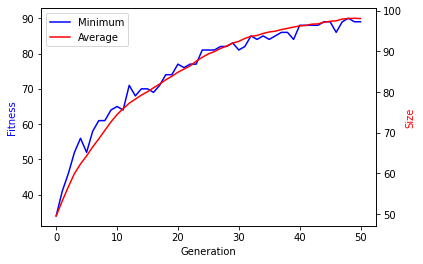

In [13]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, fit_min, "b", label="Minimum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

ax2 = ax1.twinx()
line2 = ax2.plot(gen, fit_avg, "r", label="Average")
ax2.set_ylabel("Size", color="r")

lns = line1 + line2
labs = ['Minimum', 'Average']
ax1.legend(lns, labs)

plt.show()

### Exploração de algoritmo

teste 1: reprodução cxTwoPoint

In [14]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

/opt/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/opt/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [15]:
toolbox=base.Toolbox()
#gerador de atributos
toolbox.register("attr_bool", random.randint, 0, 1)
#inicializador de estrutura
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [16]:
#estrutura de reprodução
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [17]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

In [18]:
pop = toolbox.population(n=300)
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=.5, mutpb=.2, ngen=50, stats=stats, verbose=True)

gen	nevals	avg  	std    	min	max
0  	300   	49.91	5.15253	36 	67 
1  	188   	54.4067	4.24986	44 	71 
2  	184   	57.7167	4.19719	45 	71 
3  	162   	60.89  	4.023  	50 	72 
4  	181   	64.13  	3.70582	53 	77 
5  	177   	66.8933	3.42665	55 	77 
6  	195   	69.4867	2.90915	57 	78 
7  	188   	71.3533	2.52094	62 	78 
8  	172   	73.0833	2.67639	60 	80 
9  	169   	74.6267	2.46589	66 	81 
10 	195   	75.9833	2.7622 	66 	84 
11 	181   	77.56  	2.78084	70 	86 
12 	180   	79.14  	2.70932	69 	86 
13 	170   	80.66  	2.80435	70 	88 
14 	175   	82.2133	2.65979	71 	90 
15 	199   	83.8267	2.44198	74 	90 
16 	171   	85.04  	2.69414	74 	92 
17 	173   	86.2867	2.40925	78 	92 
18 	169   	87.6467	2.19738	78 	92 
19 	182   	88.5233	2.2868 	80 	92 
20 	174   	89.1233	2.44706	77 	93 
21 	172   	90.3167	1.77099	84 	94 
22 	157   	91.08  	1.75697	83 	94 
23 	158   	91.4667	2.09497	80 	95 
24 	165   	91.8233	2.32783	83 	95 
25 	168   	92.3067	2.43707	79 	97 
26 	175   	93.3633	1.90035	83 	97 
27 	172   	93.7067	2.236

In [19]:
genT1 = logbook.select("gen")
fit_minT1 = logbook.select("min")
fit_avgT1 = logbook.select("avg")

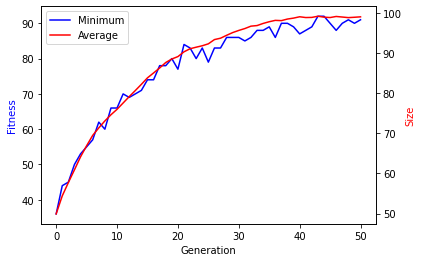

In [20]:
fig, ax1 = plt.subplots()
line1 = ax1.plot(genT1, fit_minT1, "b", label="Minimum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

ax2 = ax1.twinx()
line2 = ax2.plot(genT1, fit_avgT1, "r", label="Average")
ax2.set_ylabel("Size", color="r")

lns = line1 + line2
labs = ['Minimum', 'Average']
ax1.legend(lns, labs)

plt.show()

teste 2: aumento de numero de gerações 

In [21]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox=base.Toolbox()
#gerador de atributos
toolbox.register("attr_bool", random.randint, 0, 1)
#inicializador de estrutura
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

#estrutura de reprodução
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [22]:
pop = toolbox.population(n=300)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=.5, mutpb=.2, ngen=100, stats=stats, verbose=True)

gen	nevals	avg    	std    	min	max
0  	300   	50.3067	4.96178	34 	62 
1  	179   	54.1733	3.88029	40 	64 
2  	165   	57.18  	3.43137	48 	65 
3  	155   	59.98  	2.80469	51 	69 
4  	161   	61.8   	2.81306	51 	72 
5  	189   	63.8267	3.18276	52 	73 
6  	169   	66.2133	2.89157	58 	75 
7  	181   	68.2233	3.11771	57 	77 
8  	196   	70.4267	2.78411	63 	79 
9  	197   	72.3567	2.91938	65 	82 
10 	181   	74.15  	2.9756 	64 	82 
11 	196   	76.1567	2.88885	67 	84 
12 	191   	77.8167	2.99049	69 	86 
13 	164   	79.6867	2.71081	69 	88 
14 	180   	81.0867	2.85409	71 	88 
15 	172   	82.73  	2.68523	72 	88 
16 	196   	84.22  	2.39268	75 	89 
17 	182   	85.3733	2.63956	75 	91 
18 	196   	86.5967	2.30954	76 	92 
19 	182   	87.6467	2.03023	79 	92 
20 	174   	88.6   	2.08806	80 	93 
21 	163   	89.2333	2.18607	81 	94 
22 	189   	90.08  	2.24357	83 	94 
23 	157   	91.0867	2.13678	82 	95 
24 	172   	91.88  	2.26103	84 	96 
25 	179   	92.8567	2.11726	84 	96 
26 	174   	93.4233	2.27247	85 	96 
27 	177   	94.0567	2

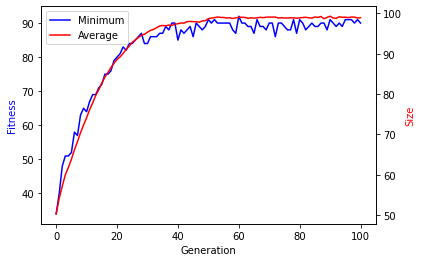

In [23]:
genT2 = logbook.select("gen")
fit_minT2 = logbook.select("min")
fit_avgT2 = logbook.select("avg")

fig, ax1 = plt.subplots()
line1 = ax1.plot(genT2, fit_minT2, "b", label="Minimum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

ax2 = ax1.twinx()
line2 = ax2.plot(genT2, fit_avgT2, "r", label="Average")
ax2.set_ylabel("Size", color="r")

lns = line1 + line2
labs = ['Minimum', 'Average']
ax1.legend(lns, labs)

plt.show()

teste 3: mudança em fator de mutação

In [24]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox=base.Toolbox()
#gerador de atributos
toolbox.register("attr_bool", random.randint, 0, 1)
#inicializador de estrutura
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

#estrutura de reprodução
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [25]:
pop = toolbox.population(n=300)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=.5, mutpb=.4, ngen=40, stats=stats, verbose=True)

gen	nevals	avg  	std    	min	max
0  	300   	50.46	5.11094	36 	66 
1  	223   	54.7033	4.11282	43 	67 
2  	196   	58.11  	3.79709	46 	71 
3  	213   	60.8867	3.31066	51 	71 
4  	226   	63.13  	3.2259 	54 	71 
5  	216   	65.6167	3.11176	57 	72 
6  	208   	67.73  	2.79113	60 	75 
7  	218   	69.1633	2.80178	61 	76 
8  	200   	70.79  	2.86924	61 	78 
9  	191   	72.5733	2.71378	65 	80 
10 	207   	73.74  	2.88197	65 	81 
11 	234   	75.0267	3.04291	66 	84 
12 	224   	76.2033	3.41008	63 	84 
13 	211   	78.1433	3.42872	69 	87 
14 	203   	79.6867	3.29977	72 	87 
15 	229   	80.7867	3.20642	72 	88 
16 	207   	82.35  	3.32277	71 	90 
17 	206   	83.7333	3.21282	73 	91 
18 	190   	84.77  	3.23065	74 	94 
19 	224   	85.8067	3.20145	73 	94 
20 	207   	86.85  	2.93613	77 	94 
21 	207   	87.4233	2.86661	78 	93 
22 	212   	88.1   	2.81484	77 	94 
23 	215   	88.5067	3.05013	78 	94 
24 	199   	89.2667	2.92271	79 	95 
25 	199   	89.8   	3.04412	80 	95 
26 	211   	90.37  	3.13259	77 	97 
27 	201   	90.8667	3.083

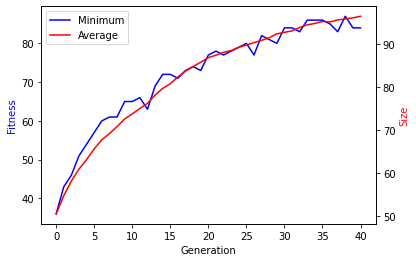

In [26]:
genT3 = logbook.select("gen")
fit_minT3 = logbook.select("min")
fit_avgT3 = logbook.select("avg")

fig, ax1 = plt.subplots()
line1 = ax1.plot(genT3, fit_minT3, "b", label="Minimum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

ax2 = ax1.twinx()
line2 = ax2.plot(genT3, fit_avgT3, "r", label="Average")
ax2.set_ylabel("Size", color="r")

lns = line1 + line2
labs = ['Minimum', 'Average']
ax1.legend(lns, labs)

plt.show()

In [27]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
pop = toolbox.population(n=300)
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=.5, mutpb=.4, ngen=100, stats=stats, verbose=True)

gen	nevals	avg    	std    	min	max
0  	300   	49.7833	5.01296	35 	64 
1  	216   	53.8767	4.03172	44 	63 
2  	235   	57.1667	3.51268	46 	65 
3  	212   	59.4633	3.13507	49 	68 
4  	207   	61.3033	2.98407	52 	70 
5  	215   	63.3333	3.05541	55 	73 
6  	218   	65.1033	3.06366	55 	74 
7  	201   	66.8967	2.5728 	60 	74 
8  	193   	67.8967	2.5032 	61 	75 
9  	207   	69.1733	2.53047	61 	76 
10 	216   	69.9633	2.68614	60 	78 
11 	194   	71.2   	2.96985	61 	78 
12 	217   	72.58  	2.94566	61 	80 
13 	211   	74.0167	2.92855	64 	80 
14 	217   	75.4333	2.97078	63 	83 
15 	219   	76.5333	3.02802	65 	83 
16 	220   	77.7467	2.69243	69 	84 
17 	217   	78.81  	2.78219	69 	85 
18 	224   	79.9   	2.86647	72 	87 
19 	208   	80.9333	2.76446	73 	87 
20 	214   	81.8033	2.73946	72 	87 
21 	223   	82.68  	2.6187 	74 	89 
22 	197   	83.5233	2.81593	72 	91 
23 	207   	84.45  	2.89382	74 	91 
24 	214   	85.2367	3.05188	75 	93 
25 	206   	86.2733	2.86798	76 	93 
26 	202   	86.6   	3.10913	75 	94 
27 	228   	87.39  	2

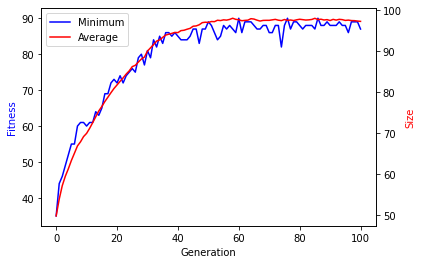

In [28]:
genT3_2 = logbook.select("gen")
fit_minT3_2 = logbook.select("min")
fit_avgT3_2 = logbook.select("avg")

fig, ax1 = plt.subplots()
line1 = ax1.plot(genT3_2, fit_minT3_2, "b", label="Minimum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

ax2 = ax1.twinx()
line2 = ax2.plot(genT3_2, fit_avgT3_2, "r", label="Average")
ax2.set_ylabel("Size", color="r")

lns = line1 + line2
labs = ['Minimum', 'Average']
ax1.legend(lns, labs)

plt.show()

Teste 4: redução na probabilidade de mutação

In [29]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox=base.Toolbox()
#gerador de atributos
toolbox.register("attr_bool", random.randint, 0, 1)
#inicializador de estrutura
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

#estrutura de reprodução
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [30]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
pop = toolbox.population(n=300)
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=.5, mutpb=.1, ngen=100, stats=stats, verbose=True)

gen	nevals	avg    	std    	min	max
0  	300   	49.8967	4.86066	37 	63 
1  	154   	53.77  	3.9434 	43 	64 
2  	177   	56.89  	3.48108	48 	70 
3  	173   	59.86  	3.07686	50 	70 
4  	173   	62.2933	2.74481	55 	70 
5  	156   	64.5067	2.78268	55 	73 
6  	169   	66.9233	2.82208	59 	76 
7  	159   	69.02  	2.85767	62 	77 
8  	179   	71.38  	2.54472	61 	78 
9  	180   	73.2133	2.20026	65 	81 
10 	168   	74.7   	2.46644	64 	81 
11 	172   	76.35  	2.29946	68 	81 
12 	171   	77.9767	2.13607	69 	85 
13 	162   	79.5   	2.11739	69 	85 
14 	156   	80.8633	2.07798	74 	86 
15 	157   	82.07  	2.11938	72 	87 
16 	169   	83.39  	1.97262	72 	87 
17 	155   	84.6467	1.54547	78 	89 
18 	142   	85.38  	1.78949	77 	89 
19 	175   	86.26  	1.81633	77 	91 
20 	167   	87.39  	1.83064	81 	92 
21 	148   	88.64  	1.94003	79 	94 
22 	172   	89.6833	1.95356	80 	95 
23 	183   	90.6467	1.96346	78 	95 
24 	171   	91.6667	1.84992	84 	96 
25 	171   	92.4967	2.09841	82 	97 
26 	147   	93.5033	2.06155	82 	98 
27 	173   	94.35  	2

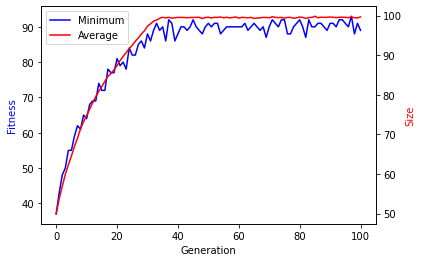

In [31]:
genT4 = logbook.select("gen")
fit_minT4 = logbook.select("min")
fit_avgT4 = logbook.select("avg")

fig, ax1 = plt.subplots()
line1 = ax1.plot(genT4, fit_minT4, "b", label="Minimum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

ax2 = ax1.twinx()
line2 = ax2.plot(genT4, fit_avgT4, "r", label="Average")
ax2.set_ylabel("Size", color="r")

lns = line1 + line2
labs = ['Minimum', 'Average']
ax1.legend(lns, labs)

plt.show()

In [32]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox=base.Toolbox()
#gerador de atributos
toolbox.register("attr_bool", random.randint, 0, 1)
#inicializador de estrutura
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

#estrutura de reprodução
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [33]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
pop = toolbox.population(n=300)
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=.5, mutpb=.01, ngen=100, stats=stats, verbose=True)

gen	nevals	avg    	std    	min	max
0  	300   	49.9367	4.91996	37 	64 
1  	133   	54.33  	4.12889	44 	66 
2  	161   	58.1733	3.11073	49 	66 
3  	174   	61.0133	3.29644	49 	71 
4  	136   	63.9533	2.98292	57 	73 
5  	157   	66.6667	2.91014	58 	75 
6  	129   	69.17  	2.70575	60 	75 
7  	165   	71.4267	2.37584	63 	80 
8  	175   	73.35  	2.4154 	65 	81 
9  	128   	75.4067	2.09156	70 	81 
10 	159   	77.2233	2.09924	71 	85 
11 	178   	78.75  	2.06095	70 	85 
12 	156   	80.59  	1.94642	76 	87 
13 	154   	82.2767	1.7758 	76 	88 
14 	128   	83.68  	1.83419	77 	90 
15 	150   	85.1933	1.90332	80 	90 
16 	156   	86.7533	1.72409	76 	91 
17 	148   	88.1033	1.58303	77 	92 
18 	156   	89.1533	1.56306	81 	93 
19 	157   	90.3667	1.39004	80 	93 
20 	169   	91.3333	1.24186	86 	95 
21 	151   	92.2767	1.04887	89 	96 
22 	162   	93.0933	0.866769	88 	95 
23 	153   	93.72  	0.825591	87 	96 
24 	158   	94.2367	0.872156	87 	97 
25 	152   	94.8333	0.94104 	88 	97 
26 	119   	95.4633	0.749659	92 	98 
27 	152   	96.0

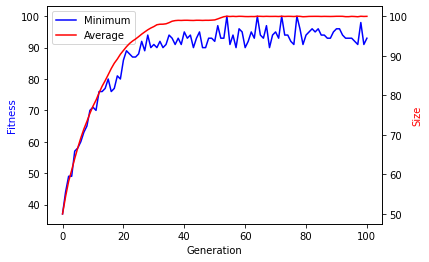

In [34]:
genT4_2 = logbook.select("gen")
fit_minT4_2 = logbook.select("min")
fit_avgT4_2 = logbook.select("avg")

fig, ax1 = plt.subplots()
line1 = ax1.plot(genT4_2, fit_minT4_2, "b", label="Minimum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

ax2 = ax1.twinx()
line2 = ax2.plot(genT4_2, fit_avgT4_2, "r", label="Average")
ax2.set_ylabel("Size", color="r")

lns = line1 + line2
labs = ['Minimum', 'Average']
ax1.legend(lns, labs)

plt.show()

Teste 5: mutação embaralhamento de indices

In [35]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox=base.Toolbox()
#gerador de atributos
toolbox.register("attr_bool", random.randint, 0, 1)
#inicializador de estrutura
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

#estrutura de reprodução
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [36]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
pop = toolbox.population(n=300)
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=.5, mutpb=.1, ngen=50, stats=stats, verbose=True)

gen	nevals	avg    	std    	min	max
0  	300   	49.4667	4.87602	37 	65 
1  	138   	53.44  	3.5128 	45 	65 
2  	171   	56.52  	3.44232	46 	67 
3  	185   	59.3067	3.26384	50 	68 
4  	151   	61.94  	3.02595	54 	71 
5  	174   	64.3967	2.71894	57 	72 
6  	143   	66.6467	2.64358	58 	76 
7  	181   	68.6733	2.54033	59 	76 
8  	159   	70.95  	2.55881	59 	79 
9  	147   	73.1   	2.16564	65 	80 
10 	162   	75     	2.44131	66 	85 
11 	172   	77.06  	2.21429	70 	85 
12 	186   	78.89  	2.05213	74 	84 
13 	161   	80.8033	1.92994	76 	87 
14 	164   	82.26  	1.66905	77 	87 
15 	177   	83.7433	1.46428	80 	89 
16 	163   	84.9733	1.59978	80 	90 
17 	158   	86.3767	1.65775	82 	91 
18 	173   	87.8133	1.58277	83 	92 
19 	177   	89.1167	1.53505	85 	94 
20 	164   	90.3733	1.43781	85 	95 
21 	158   	91.61  	1.40638	86 	96 
22 	164   	92.7967	1.33241	89 	96 
23 	168   	93.91  	1.21733	90 	98 
24 	196   	94.9933	0.989927	92 	98 
25 	165   	95.7733	0.89179 	92 	98 
26 	163   	96.4267	0.915399	94 	99 
27 	158   	97.073

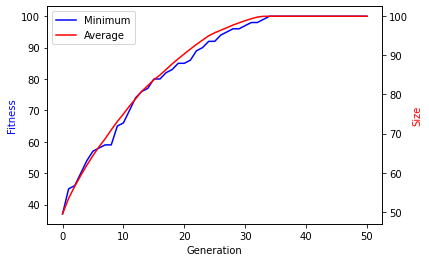

In [37]:
genT5 = logbook.select("gen")
fit_minT5 = logbook.select("min")
fit_avgT5 = logbook.select("avg")

fig, ax1 = plt.subplots()
line1 = ax1.plot(genT5, fit_minT5, "b", label="Minimum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

ax2 = ax1.twinx()
line2 = ax2.plot(genT5, fit_avgT5, "r", label="Average")
ax2.set_ylabel("Size", color="r")

lns = line1 + line2
labs = ['Minimum', 'Average']
ax1.legend(lns, labs)

plt.show()

In [38]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
pop = toolbox.population(n=300)
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=.5, mutpb=.4, ngen=50, stats=stats, verbose=True)

gen	nevals	avg    	std   	min	max
0  	300   	49.7033	5.0321	37 	63 
1  	205   	53.63  	3.96313	42 	63 
2  	209   	57.0233	3.26437	47 	64 
3  	201   	59.9533	2.93334	53 	70 
4  	197   	62.45  	2.75575	54 	75 
5  	213   	64.8167	2.58258	56 	75 
6  	206   	66.8667	2.84292	58 	78 
7  	212   	69.1067	3.16259	60 	80 
8  	211   	71.9267	3.25289	60 	81 
9  	202   	74.5633	2.86112	66 	81 
10 	217   	77.1833	2.59546	69 	84 
11 	223   	79.14  	2.21669	73 	87 
12 	205   	80.8533	2.09726	75 	88 
13 	214   	82.4767	2.0517 	76 	90 
14 	213   	84.23  	1.98757	78 	90 
15 	209   	85.95  	1.98515	81 	92 
16 	215   	87.6067	1.94901	82 	92 
17 	207   	89.2433	1.66657	83 	94 
18 	215   	90.64  	1.51561	86 	96 
19 	193   	91.8433	1.37312	88 	96 
20 	216   	93.0067	1.25961	89 	97 
21 	216   	94.03  	1.16151	91 	98 
22 	204   	94.9767	1.08141	92 	98 
23 	214   	95.9267	1.03342	93 	99 
24 	205   	96.7933	1.08195	93 	100
25 	209   	97.7333	0.876863	95 	100
26 	213   	98.39  	0.751377	96 	100
27 	207   	98.9967	0

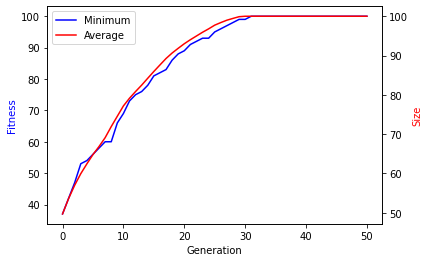

In [39]:
genT5_2 = logbook.select("gen")
fit_minT5_2 = logbook.select("min")
fit_avgT5_2 = logbook.select("avg")

fig, ax1 = plt.subplots()
line1 = ax1.plot(genT5_2, fit_minT5_2, "b", label="Minimum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

ax2 = ax1.twinx()
line2 = ax2.plot(genT5_2, fit_avgT5_2, "r", label="Average")
ax2.set_ylabel("Size", color="r")

lns = line1 + line2
labs = ['Minimum', 'Average']
ax1.legend(lns, labs)

plt.show()

teste 6: seleção natural de piores individuos

In [42]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox=base.Toolbox()
#gerador de atributos
toolbox.register("attr_bool", random.randint, 0, 1)
#inicializador de estrutura
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

#estrutura de reprodução
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selWorst)

In [45]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
pop = toolbox.population(n=300)
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=.5, mutpb=.2, ngen=50, stats=stats, verbose=True)

gen	nevals	avg  	std    	min	max
0  	300   	50.14	4.72304	37 	64 
1  	186   	50.12	5.09891	37 	65 
2  	185   	50.05	5.30291	35 	65 
3  	195   	50.0767	5.60751	35 	65 
4  	170   	50.0367	5.76096	35 	65 
5  	187   	50     	6.01831	32 	66 
6  	172   	49.9833	6.30685	32 	66 
7  	187   	49.9067	6.49497	33 	69 
8  	180   	49.7533	6.64473	33 	69 
9  	147   	49.69  	6.79563	31 	72 
10 	188   	49.6233	7.07117	31 	72 
11 	176   	49.6667	7.21357	32 	73 
12 	176   	49.5333	7.34862	31 	72 
13 	170   	49.5   	7.37993	31 	72 
14 	179   	49.48  	7.42673	29 	74 
15 	184   	49.49  	7.62473	28 	73 
16 	170   	49.4867	7.68222	29 	73 
17 	175   	49.4333	7.89845	29 	73 
18 	161   	49.3867	7.88694	29 	73 
19 	187   	49.37  	7.97787	28 	75 
20 	176   	49.5167	8.12135	25 	75 
21 	191   	49.5367	8.30072	26 	76 
22 	170   	49.58  	8.50668	24 	76 
23 	173   	49.6067	8.52713	25 	71 
24 	174   	49.6033	8.57823	25 	71 
25 	171   	49.5767	8.64354	25 	71 
26 	199   	49.58  	8.84818	25 	72 
27 	174   	49.58  	8.93403	2

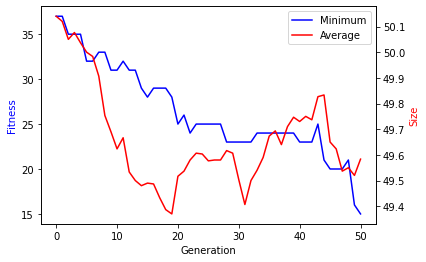

In [46]:
genT6 = logbook.select("gen")
fit_minT6 = logbook.select("min")
fit_avgT6 = logbook.select("avg")

fig, ax1 = plt.subplots()
line1 = ax1.plot(genT6, fit_minT6, "b", label="Minimum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

ax2 = ax1.twinx()
line2 = ax2.plot(genT6, fit_avgT6, "r", label="Average")
ax2.set_ylabel("Size", color="r")

lns = line1 + line2
labs = ['Minimum', 'Average']
ax1.legend(lns, labs)

plt.show()

In [47]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox=base.Toolbox()
#gerador de atributos
toolbox.register("attr_bool", random.randint, 0, 1)
#inicializador de estrutura
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

#estrutura de reprodução
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selBest)

In [49]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
pop = toolbox.population(n=300)
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=.5, mutpb=.2, ngen=50, stats=stats, verbose=True)

gen	nevals	avg  	std    	min	max
0  	300   	50.28	5.20656	38 	65 
1  	187   	50.3167	5.66242	37 	67 
2  	187   	50.24  	5.94495	34 	67 
3  	174   	50.26  	6.19132	34 	72 
4  	175   	50.1667	6.49915	32 	72 
5  	185   	50.1967	6.80426	29 	72 
6  	175   	50.0967	6.88723	27 	72 
7  	163   	50.07  	7.0568 	31 	72 
8  	178   	50.0167	7.25969	31 	72 
9  	165   	50     	7.47797	30 	73 
10 	181   	49.8633	7.69965	30 	73 
11 	188   	49.8533	7.97737	28 	73 
12 	177   	49.8967	8.21904	29 	73 
13 	173   	49.87  	8.39721	26 	74 
14 	195   	49.9233	8.47924	28 	74 
15 	176   	49.88  	8.53692	28 	74 
16 	190   	49.83  	8.64568	28 	76 
17 	195   	49.82  	8.79551	24 	76 
18 	187   	49.8433	8.83094	24 	76 
19 	181   	49.8033	8.83731	22 	78 
20 	172   	49.8967	8.95317	22 	78 
21 	197   	49.9   	8.96753	24 	78 
22 	178   	49.9933	8.96251	24 	78 
23 	200   	49.9767	9.06768	24 	75 
24 	176   	50.0833	8.97086	23 	75 
25 	180   	50.08  	9.04767	23 	76 
26 	177   	50.1167	8.98683	27 	76 
27 	177   	50.15  	9.096

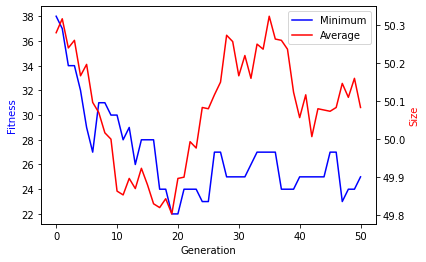

In [50]:
genT6_2 = logbook.select("gen")
fit_minT6_2 = logbook.select("min")
fit_avgT6_2 = logbook.select("avg")

fig, ax1 = plt.subplots()
line1 = ax1.plot(genT6_2, fit_minT6_2, "b", label="Minimum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

ax2 = ax1.twinx()
line2 = ax2.plot(genT6_2, fit_avgT6_2, "r", label="Average")
ax2.set_ylabel("Size", color="r")

lns = line1 + line2
labs = ['Minimum', 'Average']
ax1.legend(lns, labs)

plt.show()

In [51]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
pop = toolbox.population(n=300)
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=.5, mutpb=.2, ngen=200, stats=stats, verbose=True)

gen	nevals	avg  	std    	min	max
0  	300   	49.86	5.16143	36 	63 
1  	182   	49.7867	5.58699	36 	69 
2  	170   	49.83  	5.8851 	33 	69 
3  	172   	49.7833	6.00914	31 	69 
4  	177   	49.77  	6.33591	30 	69 
5  	177   	49.69  	6.50235	30 	67 
6  	175   	49.6967	6.89961	28 	70 
7  	176   	49.6767	7.07664	26 	70 
8  	185   	49.68  	7.14779	30 	70 
9  	176   	49.6433	7.32913	30 	71 
10 	203   	49.7067	7.50693	29 	71 
11 	173   	49.77  	7.54523	29 	74 
12 	184   	49.7433	7.64051	29 	74 
13 	180   	49.75  	7.81286	29 	74 
14 	180   	49.74  	7.92501	29 	73 
15 	192   	49.7167	7.9785 	29 	71 
16 	165   	49.61  	8.07535	29 	71 
17 	169   	49.5133	8.15781	28 	71 
18 	182   	49.4867	8.29878	28 	71 
19 	181   	49.3967	8.35978	25 	72 
20 	185   	49.4367	8.49663	23 	71 
21 	188   	49.4667	8.50464	26 	71 
22 	181   	49.4467	8.56001	25 	71 
23 	203   	49.3667	8.53105	27 	72 
24 	168   	49.25  	8.62984	27 	76 
25 	192   	49.28  	8.64262	27 	76 
26 	188   	49.4367	8.59531	27 	74 
27 	172   	49.6033	8.654

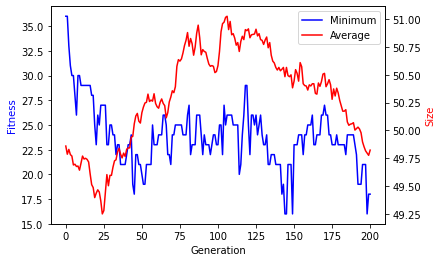

In [52]:
genT6_3 = logbook.select("gen")
fit_minT6_3 = logbook.select("min")
fit_avgT6_3 = logbook.select("avg")

fig, ax1 = plt.subplots()
line1 = ax1.plot(genT6_3, fit_minT6_3, "b", label="Minimum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

ax2 = ax1.twinx()
line2 = ax2.plot(genT6_3, fit_avgT6_3, "r", label="Average")
ax2.set_ylabel("Size", color="r")

lns = line1 + line2
labs = ['Minimum', 'Average']
ax1.legend(lns, labs)

plt.show()

In [53]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox=base.Toolbox()
#gerador de atributos
toolbox.register("attr_bool", random.randint, 0, 1)
#inicializador de estrutura
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

#estrutura de reprodução
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selRandom)

In [54]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
pop = toolbox.population(n=300)
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=.5, mutpb=.2, ngen=50, stats=stats, verbose=True)

gen	nevals	avg  	std    	min	max
0  	300   	49.61	4.78308	36 	66 
1  	183   	49.1167	5.02889	36 	65 
2  	189   	48.8733	5.02566	39 	63 
3  	179   	48.7433	4.92857	34 	60 
4  	174   	49.0133	4.64326	35 	59 
5  	195   	48.9567	4.7583 	35 	62 
6  	180   	48.92  	4.58624	34 	59 
7  	179   	48.9233	4.53256	33 	60 
8  	189   	48.8733	4.53916	33 	61 
9  	180   	48.84  	4.59286	33 	62 
10 	173   	48.5567	4.74132	33 	62 
11 	174   	48.1767	4.69455	33 	60 
12 	191   	48.7233	4.39547	34 	59 
13 	184   	48.8433	4.59914	37 	63 
14 	154   	48.43  	4.74395	37 	63 
15 	164   	48.3367	4.74025	38 	63 
16 	181   	48.3367	4.55082	38 	61 
17 	178   	48.2767	4.70604	38 	62 
18 	172   	48.5667	4.46903	37 	59 
19 	188   	49.0667	4.62769	35 	62 
20 	174   	49.4367	4.71232	38 	68 
21 	174   	49.17  	4.67772	38 	63 
22 	178   	49.1967	4.94146	36 	63 
23 	170   	49.2233	5.30158	37 	65 
24 	184   	49.56  	5.21981	38 	65 
25 	186   	49.8467	5.45862	38 	63 
26 	190   	49.4467	5.11082	34 	62 
27 	177   	49.2833	5.189

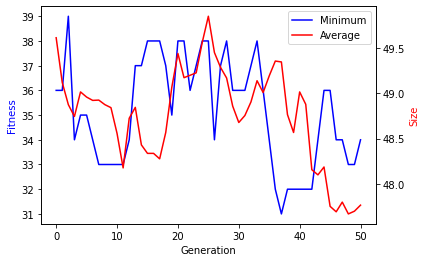

In [55]:
genT6_3 = logbook.select("gen")
fit_minT6_3 = logbook.select("min")
fit_avgT6_3 = logbook.select("avg")

fig, ax1 = plt.subplots()
line1 = ax1.plot(genT6_3, fit_minT6_3, "b", label="Minimum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

ax2 = ax1.twinx()
line2 = ax2.plot(genT6_3, fit_avgT6_3, "r", label="Average")
ax2.set_ylabel("Size", color="r")

lns = line1 + line2
labs = ['Minimum', 'Average']
ax1.legend(lns, labs)

plt.show()

teste 7: junção de teste 5 e 6

In [56]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox=base.Toolbox()
#gerador de atributos
toolbox.register("attr_bool", random.randint, 0, 1)
#inicializador de estrutura
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

#estrutura de reprodução
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05),
toolbox.register("select", tools.selBest)

In [57]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
pop = toolbox.population(n=300)
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=.5, mutpb=.2, ngen=50, stats=stats, verbose=True)

gen	nevals	avg    	std    	min	max
0  	300   	50.3267	4.65116	38 	64 
1  	185   	50.3267	5.14133	37 	65 
2  	208   	50.3267	5.56537	33 	68 
3  	174   	50.3267	5.82294	34 	68 
4  	182   	50.3267	6.14057	34 	66 
5  	198   	50.3267	6.38017	33 	67 
6  	165   	50.3267	6.66483	34 	72 
7  	182   	50.3267	6.98951	33 	73 
8  	182   	50.3267	7.10211	30 	75 
9  	175   	50.3267	7.39819	30 	79 
10 	191   	50.3267	7.66898	31 	79 
11 	166   	50.3267	7.80213	31 	79 
12 	183   	50.3267	8.06515	30 	79 
13 	187   	50.3267	8.28814	30 	75 
14 	191   	50.3267	8.51156	29 	75 
15 	183   	50.3267	8.71129	27 	80 
16 	193   	50.3267	8.88782	24 	80 
17 	186   	50.3267	9.01813	27 	81 
18 	195   	50.3267	9.19746	26 	81 
19 	184   	50.3267	9.41134	26 	81 
20 	169   	50.3267	9.56452	26 	81 
21 	171   	50.3267	9.69742	21 	81 
22 	184   	50.3267	9.87657	22 	81 
23 	191   	50.3267	10.0426	23 	82 
24 	176   	50.3267	10.1787	23 	80 
25 	170   	50.3267	10.3586	24 	80 
26 	173   	50.3267	10.5233	24 	82 
27 	176   	50.3267	1

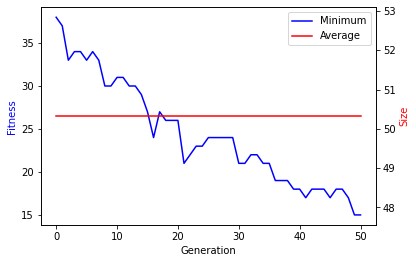

In [58]:
genT7 = logbook.select("gen")
fit_minT7 = logbook.select("min")
fit_avgT7 = logbook.select("avg")

fig, ax1 = plt.subplots()
line1 = ax1.plot(genT7, fit_minT7, "b", label="Minimum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

ax2 = ax1.twinx()
line2 = ax2.plot(genT7, fit_avgT7, "r", label="Average")
ax2.set_ylabel("Size", color="r")

lns = line1 + line2
labs = ['Minimum', 'Average']
ax1.legend(lns, labs)

plt.show()

In [61]:
toolbox.register("select", tools.selWorst)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
pop = toolbox.population(n=300)
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=.5, mutpb=.2, ngen=50, stats=stats, verbose=True)

gen	nevals	avg    	std    	min	max
0  	300   	49.6167	4.98027	35 	67 
1  	197   	49.6167	5.3743 	35 	66 
2  	173   	49.6167	5.71108	33 	67 
3  	169   	49.6167	6.05005	33 	68 
4  	172   	49.6167	6.36891	29 	69 
5  	196   	49.6167	6.66906	30 	71 
6  	178   	49.6167	6.94284	30 	71 
7  	174   	49.6167	7.16587	28 	71 
8  	187   	49.6167	7.44511	26 	71 
9  	186   	49.6167	7.64437	26 	71 
10 	173   	49.6167	7.86234	26 	71 
11 	197   	49.6167	8.10533	26 	71 
12 	197   	49.6167	8.32044	22 	71 
13 	184   	49.6167	8.50704	21 	77 
14 	179   	49.6167	8.69232	21 	77 
15 	193   	49.6167	8.87673	21 	75 
16 	192   	49.6167	9.05077	19 	78 
17 	176   	49.6167	9.20198	19 	78 
18 	156   	49.6167	9.31002	19 	78 
19 	189   	49.6167	9.53256	19 	76 
20 	170   	49.6167	9.69792	19 	75 
21 	158   	49.6167	9.80492	19 	76 
22 	191   	49.6167	9.99482	19 	78 
23 	179   	49.6167	10.1241	20 	78 
24 	173   	49.6167	10.3204	20 	78 
25 	179   	49.6167	10.4701	21 	80 
26 	177   	49.6167	10.6199	21 	80 
27 	182   	49.6167	1

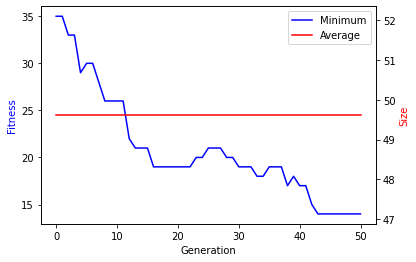

In [64]:
genT7_2 = logbook.select("gen")
fit_minT7_2 = logbook.select("min")
fit_avgT7_2 = logbook.select("avg")

fig, ax1 = plt.subplots()
line1 = ax1.plot(genT7_2, fit_minT7_2, "b", label="Minimum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

ax2 = ax1.twinx()
line2 = ax2.plot(genT7_2, fit_avgT7_2, "r", label="Average")
ax2.set_ylabel("Size", color="r")

lns = line1 + line2
labs = ['Minimum', 'Average']
ax1.legend(lns, labs)

plt.show()

In [65]:
toolbox.register("select", tools.selRandom)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
pop = toolbox.population(n=300)
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=.5, mutpb=.2, ngen=50, stats=stats, verbose=True)

gen	nevals	avg    	std    	min	max
0  	300   	49.4467	4.70253	33 	61 
1  	172   	49.7667	4.87841	31 	61 
2  	169   	49.7   	4.84527	32 	60 
3  	181   	49.9233	4.74526	32 	64 
4  	176   	49.65  	4.49676	36 	60 
5  	164   	49.5467	4.37049	39 	60 
6  	188   	49.8567	4.36686	39 	61 
7  	187   	49.74  	4.21257	38 	60 
8  	169   	49.5433	4.34835	38 	61 
9  	176   	49.2067	4.1973 	38 	60 
10 	170   	49.3567	4.59813	38 	60 
11 	186   	49.35  	4.98406	36 	63 
12 	167   	49.18  	4.79037	34 	62 
13 	192   	48.7633	5.05048	34 	63 
14 	175   	49.3167	5.05929	37 	63 
15 	192   	49.5333	5.12922	36 	63 
16 	180   	49.55  	4.67056	39 	63 
17 	198   	49.2333	4.6006 	38 	63 
18 	189   	49.7233	4.64113	38 	67 
19 	179   	49.5233	4.91421	37 	67 
20 	169   	49.4667	4.68354	32 	67 
21 	173   	49.4367	4.91114	36 	63 
22 	185   	49.57  	4.65959	35 	63 
23 	172   	49.2733	4.72144	34 	61 
24 	186   	48.7933	4.63867	34 	59 
25 	185   	48.97  	4.78426	34 	60 
26 	183   	49.0567	5.08201	32 	60 
27 	176   	48.7433	5

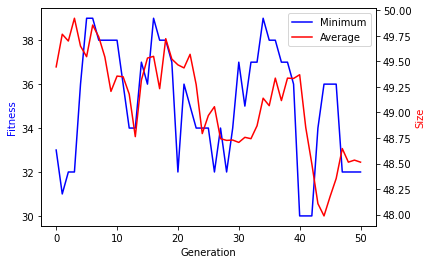

In [66]:
genT7_2 = logbook.select("gen")
fit_minT7_2 = logbook.select("min")
fit_avgT7_2 = logbook.select("avg")

fig, ax1 = plt.subplots()
line1 = ax1.plot(genT7_2, fit_minT7_2, "b", label="Minimum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

ax2 = ax1.twinx()
line2 = ax2.plot(genT7_2, fit_avgT7_2, "r", label="Average")
ax2.set_ylabel("Size", color="r")

lns = line1 + line2
labs = ['Minimum', 'Average']
ax1.legend(lns, labs)

plt.show()